In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Cargar el dataset MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocesar los datos


In [3]:
x_train = x_train / 255.0  # Normalización de las imágenes de entrenamiento
x_test = x_test / 255.0    # Normalización de las imágenes de prueba

## Convertir las etiquetas a formato categórico (one-hot encoding)

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Crear el modelo de la red neuronal

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Aplana la imagen de 28x28 a un vector de 784 elementos
    Dense(128, activation='relu'),       # Capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),        # Capa oculta adicional con 64 neuronas y activación ReLU
    Dense(10, activation='softmax')      # Capa de salida con 10 neuronas y activación softmax para clasificación
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compilar el modelo

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenar el modelo

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8751 - loss: 0.4305 - val_accuracy: 0.9661 - val_loss: 0.1171
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9679 - loss: 0.1066 - val_accuracy: 0.9650 - val_loss: 0.1122
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0671 - val_accuracy: 0.9731 - val_loss: 0.0838
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9844 - loss: 0.0483 - val_accuracy: 0.9769 - val_loss: 0.0753
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9779 - val_loss: 0.0719
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9770 - val_loss: 0.0756
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0247 - val_accuracy: 0.9802 - val_loss: 0.0738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.022

## Evaluar el modelo en el conjunto de prueba

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0994

Precisión en el conjunto de prueba: 0.98


## Graficar la precisión y la pérdida durante el entrenamiento

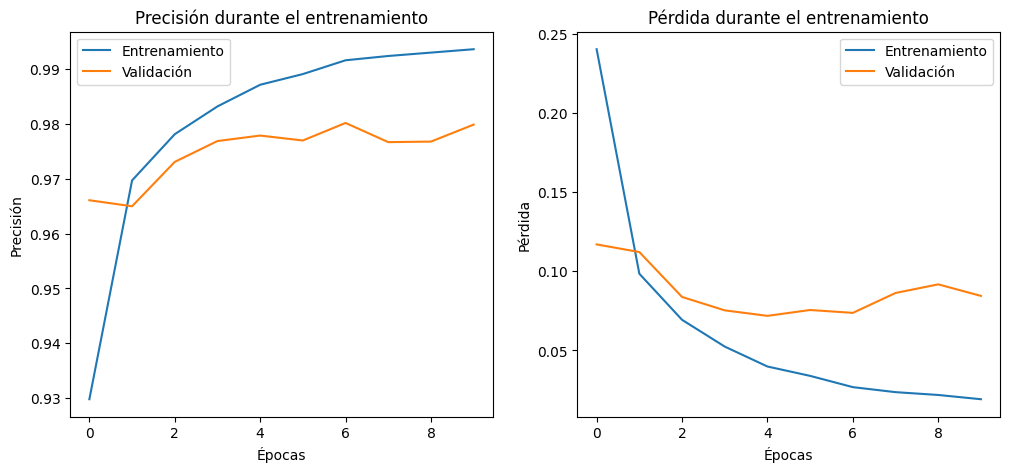

In [9]:
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.show()